# Week 2 - Classical information in a nutshell <a class="tocSkip">
    (c) Ariel Guerreiro 2023

In this notebook, we will dive into the fundamental concepts and techniques from classical information theory relevant to quantum information. Our focus will be on Shannon's contributions to the probabilistic formulation of information.

We will begin with an introduction to the core of classical information theory. We will cover how to represent statistical ensembles and probability vectors using Python. We will also explore the probability functions of multiple variables, including joint probability distributions, conditional probability, and marginal probability.

Next, we will move on to quantifying information. We will discuss Shannon entropy as a measure of uncertainty in a random variable. We will illustrate how to compress data and introduce the notions of relative entropy, joint entropy, conditional information, and mutual information as relative measures of information.

We will then discuss information channels as paradigms of information systems. We will cover noisy channels, error correction, and the capacity of a channel.

Finally, we will conclude with a discussion of inference as a way to extract information about one random variable from another.

Throughout the notebook, we will provide Python codes to illustrate the concepts, examples, and exercises, both computational and analytical. The goal is to promote a hands-on approach to the study of classical information theory and its relationship to quantum information.

To get started, we first need to import the necessary Python libraries and use the magic lines to get your notebook ready. Let's get started!

In [1]:
import numpy as np
import scipy as sp
from scipy.stats import entropy

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import random
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## The core in the shell of classical information theory

This section provides the foundation for understanding classical information theory. It introduces the basics of probability theory and how it is used to describe classical information.

We will start by discussing the representation of statistical ensembles and probability vectors using Python. We will explore how to model the probability distribution of a random variable and how to describe the probability functions of multiple variables.

We will then introduce the concepts of joint probability distributions, conditional probability, and marginal probability. Joint probability distributions allow us to analyze the relationship between two or more random variables, while conditional probability and marginal probability help us to extract information about one variable from another.

### Information as a Probability Distribution
In classical information theory, the uncertainty or randomness associated with an event is characterized by its probability distribution over the set of possible states. A probability distribution is a function that describes the likelihood of each possible outcome in a random event. It can be represented by a probability mass function (PMF), which maps each outcome to a probability value.

#### Ensembles and Probability Distribution
An ensemble in probability and classical information theory is a mathematical representation of a random variable and its associated probabilities. It consists of three components: an outcome $x$, a set of possible values $\Omega_X$, and a probability distribution $P_X$. The outcome $x$ refers to the values taken by a random variable $X$. The set of possible values $\Omega_X$ is a list of all the possible outcomes for the random variable $X$. The probability distribution $P_X$ is an array of values, each representing the probability of a particular outcome.

In an ensemble, a probability distribution is associated with a specific random variable, $X$. For example, if we consider the random variable $X$ to be the result of a coin flip, then the possible outcomes are "heads" and "tails" and the associated probabilities are 0.5 each. An ensemble for this scenario can be defined as:

$$ (x, \Omega_X, P_X) = ("heads",{"heads","tails"},{0.5,0.5})$$

Here, $x = \text{"heads"}$ is the outcome, $\Omega_X = \{\text{"heads"}, \text{"tails"}\}$ is the set of possible values, and $P_X = \{0.5, 0.5\}$ is the probability distribution.

Here is a simple implementation of an ensemble class in python:

In [2]:
class Ensemble:
    def __init__(self, x, O_X, P_X):
        self.x = x
        self.O_X = O_X
        self.P_X = P_X
        
    def display(self):
        print("Outcome:", self.x)
        print("Set of possible values:", self.O_X)
        print("Probability distribution:", self.P_X)
        
ensemble = Ensemble("heads", ["heads", "tails"], [0.5, 0.5])
ensemble.display()


Outcome: heads
Set of possible values: ['heads', 'tails']
Probability distribution: [0.5, 0.5]


#### Probability Vector

Working throughout this lecture course with Ensembles, specially in the python encoding, is ..... not as easy and clean at it may appear at first glance (we would need to use classes and encapsulation). Hence we adopt another approach which is basically splitting the notion of ensemble in its three parts. 

The information about a random variable $X$ can also be described by a function $p(x)$, which maps each state $x$ of $X$ to a non-negative real value $p(x)$, such that the sum of all probabilities of observing the corresponding states of $X$, $\sum_x p(x) = 1$. This is known as a probability vector, which can be represented as a 1-dimensional numpy array. The normalization property ensures that the sum of all values in the array is equal to 1, implying that the event is certain to occur.

Consider the previous example, where we were modeling the outcome of a fair coin flip as a random variable $X$ with two possible values: "heads" and "tails". The associated probabilities of each outcome can be represented as a probability vector $p = [p_1, p_2]$, where $p_1$ and $p_2$ are the probabilities of observing "heads" and "tails", respectively.

For a fair coin flip, both "heads" and "tails" have an equal probability of 0.5, so we have $p = [0.5, 0.5]$. To implement this in Python, we can define the probability vector as a list:

In [3]:
p = [0.5, 0.5]

We can access each element of the vector to retrieve the associated probabilities:

In [4]:
p_heads = p[0]
p_tails = p[1]

#### Outcome set

Another component of the ensemble is the outcome set defined as the set of all possible outcomes, denoted by $\Omega_X$.

In Python a way to define a outcome set is

In [5]:
O = ('heads','tails')
print('The probability of ' + O[0] + ' is: ' + str(p[0]))

The probability of heads is: 0.5


Another way of representing the distribution is via a probability mass function using a python dictionary:

In [6]:
pmf = {
    ('heads'): 0.5,
    ('rails'): 0.5
}
print(pmf.get('heads', 0))

0.5


These structures contain information about the outcome set  $\Omega_X$ and probabilities. The only thing lacking is the random variable which is implicit.

So we have seen developing ways of developing python objects that work as containers for ensembles and probability vectors. They should be used as needed. Finally, we should stress that if may be possible to use a Numpy array to express probability vectors whenever we are going to use calculus.

#### Basic probability theory (Kolmogorov style)

In probability theory, we often talk about events, which are subsets of the outcome set $\Omega_X$.
For example, if we're rolling a six-sided die, then $\Omega_X = {1, 2, 3, 4, 5, 6}$, and the event "rolling an even number" is the subset $A = {2, 4, 6}$. Notice that you can think of $A$ as an hypothesis, as described in the lecture notes.


Probability is a way of assigning a numerical value to events. The probability of an event $A$, denoted by $P(A)$, is a number between 0 and 1 that reflects the likelihood of the event occurring. A probability of 0 means that the event is impossible, while a probability of 1 means that the event is certain. For example, the probability of rolling an even number on a six-sided die is $P({2, 4, 6}) = \frac{1}{2} = 0.5$.

To calculate probabilities, we use probability axioms and rules. These include the basic axioms of probability, such as:

* $P(A) \geq 0$ for any event $A$;
* $P(\Omega_X) = 1$;
* If $A$ and $B$ are disjoint (i.e., have no outcomes in common), then $P(A \cup B) = P(A) + P(B)$, and $P(A \cup B) = P(A) + P(B) -P(A\cap B)$

There are also more advanced rules, such as the law of total probability and Bayes' theorem, which are used to calculate conditional probabilities and make predictions based on uncertain information.

The following code generates a Venn diagram of two events:

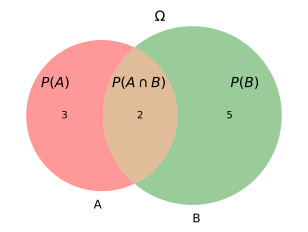

In [7]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Set sizes
A_size = 3
B_size = 5
AB_size = 2

# Draw Venn diagram
venn2(subsets=(A_size, B_size, AB_size), set_labels=('A', 'B'))

# Add labels
plt.annotate('$P(A)$', xy=(-0.6, 0.15), fontsize=14)
plt.annotate('$P(B)$', xy=(0.4, 0.15), fontsize=14)
plt.annotate('$P(A\\cap B)$', xy=(-0.225, 0.15), fontsize=14)
plt.annotate('$\Omega$', xy=(0, 0.5), fontsize=14)

# Show the plot
plt.show()



The diagram shows two sets, A and B, and their intersection, which is labeled as $A\cap B$. The area of each set corresponds to the probability of each event. For example, the area of set A represents the probability of event A, denoted by $P(A)$. Similarly, the area of set B represents the probability of event B, denoted by $P(B)$. The intersection of A and B, labeled $A\cap B$, represents the probability of the joint event "A and B", denoted by $P(A\cap B)$. The diagram illustrates the  axioms of probability.



The areas of sets A and B cannot be negative, so the diagram satisfies the non-negativity axiom. The total area of the diagram corresponds to the sample space $\Omega$, and is equal to 1, which satisfies the normalization axiom.

Also, the graphical representation allows to illustrate the third axiom: $P(A \cup B) = P(A) + P(B) -P(A\cap B)$

### Information with multiple variables

#### Probability Distributions

In many cases, we are interested in events involving multiple random variables, such as the joint distribution of two random variables X and Y. A joint probability distribution is used to represent the probability of each possible combination of outcomes. This joint probability distribution is a function $p(x,y)$ that maps each pair of states $(x,y)$ to a non-negative real value $p(x,y)$, such that the sum over all possible pairs $(x,y)$ equals 1:

\begin{equation*}
\sum_{x,y} p(x,y) = 1
\end{equation*}

The joint probability distribution can be represented as a 2-dimensional numpy array, where each row corresponds to a possible value of X and each column corresponds to a possible value of Y.

By using probability distributions, classical information theory provides a way to quantify and analyze the amount of uncertainty or randomness associated with a certain event. This concept is fundamental to many applications in fields such as communication, data compression, and information processing.

#### Conditional Probability

Besides the joint probability distribution, there are other forms of probability functions that are applied to sets of two or more variables. One important example of such probability function is conditional probability.

The Conditional Probability of an event A given another event B, denoted by $P(A|B)$, is defined as the probability of event A happening given that event B has already happened. Mathematically, it can be expressed as:

\begin{equation*}
P(A|B) = \frac{P(A \cap B)}{P(B)}
\end{equation*}

where $P(A\cap B)$ is the probability of both events $A$ and $B$ happening at the same time and $P(B)$ is the probability of event $B$ happening.

The conditional probability is useful when we are interested in understanding the relationship between two events and how the occurrence of one event affects the probability of another event happening.

For example, suppose a box  contains three types of balls: red, blue, and green. Let R, B, and G denote the events that a ball drawn from the box is red, blue, and green, respectively. Suppose that the probability of drawing a red ball is 0.4, the probability of drawing a blue ball is 0.3, and the probability of drawing a green ball is 0.3.

If you draw a ball from the box and it is not blue, you can use the formula for conditional probability to calculate the probability of drawing a red ball given that the ball drawn is not blue:

$$P(R|\bar{B}) = \frac{P(R \cap \bar{B})}{P(\bar{B})}$$

where $\bar{B}$ denotes the complement of event $B$ (i.e., the event that a ball drawn is not blue).

To apply the formula, we need to calculate the joint probability of drawing a red ball and not drawing a blue ball, as well as the probability of not drawing a blue ball. The joint probability of drawing a red ball and not drawing a blue ball is simply the probability of drawing a red ball, because if the ball drawn is red, then it cannot be blue. Thus, we have:

$$P(R \cap \bar{B}) = P(R) = 0.4$$

To calculate the probability of not drawing a blue ball, we can use the law of total probability, which states that the probability of an event can be calculated by summing over all possible ways in which the event can occur. In this case, we can partition the event "drawing a ball that is not blue" into three mutually exclusive events: drawing a red ball, drawing a green ball, or not drawing a red, blue, or green ball (i.e., drawing an "other" ball). Thus, we have:

$$P(\bar{B}) = P(R \cap \bar{B}) + P(G \cap \bar{B}) + P(O \cap \bar{B})$$

where O denotes the event of drawing an "other" ball. We can calculate the probabilities of these three events as follows:

$$P(G \cap \bar{B}) = P(G) \times P(\bar{B} | G) = 0.3 \times 1 = 0.3$$

because if the ball drawn is green, then it cannot be blue. Similarly, we have:

$$P(O \cap \bar{B}) = P(O) \times P(\bar{B} | O) = 0 $$

because if the ball drawn is not red, blue, or green, then it cannot be blue. Thus, we have:

$$P(\bar{B}) = 0.4 + 0.3 + 0= 0.7$$

Substituting these values into the formula for conditional probability, we obtain:

$$P(R|\bar{B}) = \frac{P(R \cap \bar{B})}{P(\bar{B})} = \frac{0.4}{0.7} \approx 0.57$$

So the probability of drawing a red ball given that the ball drawn is not blue, in the case of a box with three colors of balls, is 0.57.

This concept of conditional probability is important because it allows us to make predictions about events based on prior knowledge or information. For instance, in the case of Bayesian inference, the conditional probability distribution is used to make predictions about an unknown variable given some observed data.

Conditional probability, on the other hand, is the likelihood of an event occurring given that another event has already occurred. It can be calculated using Bayes' theorem, which relates the conditional probability to the joint probability and the individual probabilities of the events. The formula for calculating conditional probability is $P(A|B) = P(A \cap B) / P(B)$, where $P(A|B)$ represents the probability of event A given that event B has occurred, $P(A \cap B)$ represents the joint probability of A and B occurring, and $P(B)$ represents the probability of event B occurring.

For events involving multiple random variables, such as the joint distribution of two random variables X and Y, a joint probability distribution is used to represent the probability of each possible combination of outcomes. This joint probability distribution is a function $p(x,y)$ that maps each pair of states $(x,y)$ to a non-negative real value $p(x,y)$, such that the sum over all possible pairs $(x,y)$ equals 1: $$\sum_{x,y} p(x,y) = 1.$$ 
The joint probability distribution can be represented as a 2-dimensional numpy array, where each row corresponds to a possible value of X and each column corresponds to a possible value of Y.

By using probability distributions, classical information theory provides a way to quantify and analyze the amount of uncertainty or randomness associated with a certain event. This concept is fundamental to many applications in fields such as communication, data compression, and information processing.

In classical information theory, besides the joint probability distribution, there are other forms of probability functions that are applied to sets of two or more variables. Two important examples of such probability functions are conditional probability and marginal probability.

The **Conditional Probability** of an event $A$ given another event $B$, denoted by $P(A|B)$, is defined as the probability of event $A$ happening given that event $B$ has already happened. Mathematically, it can be expressed as:

$P(A|B) = \frac{P(A \cap B)}{P(B)}$,

where $P(A \cap B)$ is the probability of both events $A$ and $B$ happening at the same time and $P(B)$ is the probability of event $B$ happening. The conditional probability is useful when we are interested in understanding the relationship between two events and how the occurrence of one event affects the probability of another event happening.

<div class="alert alert-block alert-danger">  $P(A \cap B)$ and $P(A,B)$ represent the same concept, which is the probability of both events A and B occurring together. The difference is that $P(A \cap B)$ is written using set notation and represents the probability of the intersection of two events, while $P(A,B)$ is written using tuple notation and represents the joint probability of two events.</div>



The **Marginal Probability** of a random variable $X$, denoted by $P(X)$, is the probability of a particular value of the variable $X$ happening, marginalized or summed over all possible values of the other variables. For example, if we have a joint distribution $P(X,Y)$, the marginal probability of $X$ can be obtained by summing the joint probabilities over all possible values of $Y$:

$P(X) = \sum_Y P(X,Y)$.

Similarly, the marginal probability of $Y$ can be obtained by summing the joint probabilities over all possible values of $X$:

$P(Y) = \sum_X P(X,Y)$.

The marginal probability is useful when we are interested in understanding the probability distribution of a single variable, without considering the relationship with other variables.

Marginal probability refers to the probability of a single event occurring in a multi-event scenario. It can be thought of as the sum of the joint probabilities for a specific event, taking into account all possible outcomes of the other events. For example, consider a scenario where we have two random variables X and Y. The joint probability distribution of X and Y is given by $P(X=x_i,Y=y_j)$, where $x_i$ and $y_j$ are the possible outcomes for X and Y, respectively.

It's important to note that marginal probabilities must also satisfy the non-negativity and normalization properties of probability distributions.


In Python, these forms of probability distributions can be implemented using numpy arrays and basic mathematical operations. For example, the conditional probability of event $A$ given event $B$ can be calculated as follows:

In [8]:
def conditional_probability(B, joint_distribution):
    """
    Calculates the conditional probability of A given B, P(A|B), from the joint probability distribution.

    Parameters:
        B (int): Index of the random variable given in the joint distribution.
        joint_distribution (np.ndarray): 2D array representing the joint probability distribution of the two random variables.

    Returns:
        np.ndarray: 1D array representing the conditional probability of A given B.
    """
    p_x = np.sum(joint_distribution, axis=B)
    #print(p_b)
    p_Y_given_x = joint_distribution/ p_x
    return p_Y_given_x

And the marginal probability can be calculated as follows:

In [9]:
def marginal_probability(X, joint_distribution):
    """
    Calculates the marginal probability of a single random variable X from the joint probability distribution.

    Parameters:
        X (int): Index of the random variable in the joint distribution.
        joint_distribution (np.ndarray): 2D array representing the joint probability distribution of two random variables.

    Returns:
        float: Marginal probability of the random variable X.
    """
    p_x = np.sum(joint_distribution, axis=X)
    return p_x

The conditional_probability function takes three inputs: the indices of the two random variables A and B in the joint distribution, and the joint distribution represented as a 2D numpy array joint_distribution. The function first calculates the marginal probability of the second random variable B by summing the joint distribution along the second axis (columns). Then, it calculates the conditional probability of A given B by dividing the values in the row of the joint distribution corresponding to A by the marginal probability of B. The result is a 1D numpy array representing the conditional probability of A given B.

The marginal_probability function takes two inputs: the index of the random variable X in the joint distribution and the joint distribution represented as a 2D numpy array joint_distribution. The function calculates the marginal probability of X by summing the joint distribution along the first axis (rows). The result is a scalar representing the marginal probability of X.

An now, for something completely different: 

In [10]:
# Example joint distribution
joint_distribution = np.array([[0.3, 0.2], [0.1, 0.4]])

# Example calculation of conditional probability
p_a_given_b = conditional_probability(1, joint_distribution)
print("Conditional probability of A given B:", p_a_given_b)

# Example calculation of marginal probability
p_x = marginal_probability(0, joint_distribution)
print("Marginal probability of X:", p_x)

Conditional probability of A given B: [[0.6 0.4]
 [0.2 0.8]]
Marginal probability of X: [0.4 0.6]


Besides the joint probability distribution, the conditional probability and marginal probability are important forms of probability functions that are applied to sets of two or more variables in classical information theory. They provide valuable insights into the relationship between variables and the probability distribution of individual variables, and can be easily implemented using numpy arrays and basic mathematical operations in Python.

<div class="alert alert-block alert-info">
<b>Question 1:</b> Given the conditional probability of two variables, is it possible to recover the joint probability? How?
</div>


Yes, given the conditional probability, it is possible to recover the joint probability by using the following formula:

$P(X = x, Y = y) = P(Y = y | X = x) \cdot P(X = x)$

where $P(X = x, Y = y)$ is the joint probability of the events $X = x$ and $Y = y$, $P(Y = y | X = x)$ is the conditional probability of the event $Y = y$ given the event $X = x$, and $P(X = x)$ is the marginal probability of the event $X = x$. This formula says that the joint probability of two events can be calculated as the product of the conditional probability of one event given the other and the marginal probability of the other event.

<div class="alert alert-block alert-info">
<b>Question 2:</b> Given the marginal probability, is it possible to infer any information about the joint and conditional probability distributions of two random variables?
</div>

From the marginal probability, it is possible to get some limited information about the joint and conditional probabilities of two random variables. The marginal probability represents the probability of one random variable without considering the other. For example, consider two random variables $X$ and $Y$ and their joint probability distribution $P(X, Y)$. The marginal probability of $X$ is defined as:

$P_X(x) = \sum_{y \in Y} P(X=x, Y=y)$

and the marginal probability of $Y$ is defined as:

$P_Y(y) = \sum_{x \in X} P(X=x, Y=y)$

From the marginal probability, it is possible to compute the expected value of the random variables, but it is not possible to determine their joint distribution or their conditional distributions. To obtain the joint and conditional distributions, additional information is required, such as the joint or conditional probability mass or density functions.

#### Ensembles for multivariable probability distributions

So far we have represented joint distribution of two variables with the help of a rank-2 array, a matrix if you like, say:

$$\begin{bmatrix}
0.1 & 0.3 & 0.2 \\
0.2 & 0.2 & 0.3 \\
0.3 & 0.1 & 0.2 \\
\end{bmatrix}$$

This approach could be extended to joint distributions of more variable by increasing the rank of the array, but this is not always the most practical. Here is an alternative:

In [11]:
X = ['A', 'B', 'C']    # possible values of the first random variable
Y = [1, 2]             # possible values of the second random variable
Z = ['Yes', 'No']      # possible values of the third random variable

# create a dictionary to represent the output space
output_space = {}
for x in X:
    for y in Y:
        for z in Z:
            # assign a probability of 1/12 to each possible combination of outcomes
            output_space[(x,y,z)] = 1/12

# print the output space
print(output_space)

{('A', 1, 'Yes'): 0.08333333333333333, ('A', 1, 'No'): 0.08333333333333333, ('A', 2, 'Yes'): 0.08333333333333333, ('A', 2, 'No'): 0.08333333333333333, ('B', 1, 'Yes'): 0.08333333333333333, ('B', 1, 'No'): 0.08333333333333333, ('B', 2, 'Yes'): 0.08333333333333333, ('B', 2, 'No'): 0.08333333333333333, ('C', 1, 'Yes'): 0.08333333333333333, ('C', 1, 'No'): 0.08333333333333333, ('C', 2, 'Yes'): 0.08333333333333333, ('C', 2, 'No'): 0.08333333333333333}


This code defines a three-partite random variable with three possible values for the first variable ('A', 'B', and 'C'), two possible values for the second variable (1 and 2), and two possible values for the third variable ('Yes' and 'No'). The output space is represented as a dictionary, where each key is a tuple representing a possible combination of outcomes, and each value is the corresponding probability. In this case, each possible combination of outcomes has a probability of 1/12, since there are 322=12 possible outcomes in total.

This type of structure 

## Quantifying information

In a probability distribution, there are several quantities that can be used to quantify and characterize the information. These quantities include entropy, mutual information, Kullback-Leibler divergence, and cross-entropy.

The entropy of a probability distribution is a measure of the amount of uncertainty associated with a random variable. It is defined as:

$$H(X) = -\sum_{x_i\in A_X} p_i \log p_i$$

where $p_i$ is the probability of observing the $i$-th state $x_i$ of the random variable $X$.

The mutual information is a measure of the amount of shared information between two random variables. It is defined as:

$$I(X;Y) = \sum_{x_i\in A_X} \sum_{y_j\in A_Y} p(x_i,y_j)\log \left(\frac{p(x_i,y_j)}{p_i p_j}\right)$$

where $p(x_i,y_j)$ is the joint probability of observing states $x_i$ and $y_j$ for random variables $X$ and $Y$, respectively, and $p_i$ and $p_j$ are the marginal probabilities of observing states $x_i$ and $y_j$, respectively.

The Kullback-Leibler divergence, also known as the relative entropy, is a measure of the difference between two probability distributions. It is defined as:

$$D_{KL}(P||Q) = \sum_{x_i\in A_X} p_i \log \left(\frac{p_i}{q_i}\right)$$

where $p_i$ and $q_i$ are the probabilities of observing state $x_i$ for random variables $P$ and $Q$, respectively.

The cross-entropy is a measure of the difference between a true probability distribution and an estimated probability distribution. It is defined as:

$$H(P,Q) = -\sum_{x_i\in A_X} p_i \log q_i$$

where $p_i$ is the true probability of observing state $x_i$ for random variable $P$, and $q_i$ is the estimated probability of observing state $x_i$ for random variable $Q$.

These quantities can be used to describe and analyze the information content of a probability distribution, and they play an important role in many applications of classical information theory.

### Entropy

Entropy is a measure of uncertainty in a random variable. In other words, it quantifies the amount of information required to specify the state of the random variable. 

The entropy of a discrete random variable with states $x_1, x_2, \ldots, x_n$ and probabilities $p_1, p_2, \ldots, p_n$ is given by:

$$ H(X) = - \sum_{i=1}^n p_i \log_2 p_i $$

Let's try to calculate the entropy of a simple example.

In [12]:
def entropy(p):
    """
    Calculates the entropy of a probability distribution p
    
    Parameters
    ----------
    p : numpy array
        Probability distribution
        
    Returns
    -------
    h : float
        Entropy of the distribution
    """
    h = - np.sum(p * np.log2(p))
    return h


#use example

p = np.array([0.25, 0.75])
ent = entropy(p)
print("The entropy of the random variable is {:.2f} bits".format(ent))

The entropy of the random variable is 0.81 bits


**Problem 1:** *Entropy of a classical random variable.*


Suppose we have a random variable X that takes on two possible values, 0 and 1, with equal probability. What is the entropy of X?

*Solution:*

The entropy of a random variable X is defined as:

$$H(X) = -\sum_{x \in \text{outcomes}} P(x)\log_2 P(x)$$

For this example, the two possible outcomes are 0 and 1, and each has a probability of 0.5. Hence,

$$H(X) = -\left(0.5\log_2 0.5 + 0.5\log_2 0.5\right) = -(0.5 \cdot -1 + 0.5 \cdot -1) = 1$$

So the entropy of the random variable X is 1 bit.

### Mutual Information

Mutual information is a measure of the amount of shared information between two random variables. It quantifies the reduction in uncertainty of one random variable given the knowledge of another. 

The mutual information between two discrete random variables $X$ and $Y$ with joint probability mass function $p_{X,Y}(x,y)$ is given by:

$$ I(X;Y) = \sum_{x \in X} \sum_{y \in Y} p_{X,Y}(x,y) \log_2 \frac{p_{X,Y}(x,y)}{p_X(x)p_Y(y)} $$

Let's try to calculate the mutual information between two simple examples.


In [13]:
def mutual_entropy(p_xy):
    """
    Calculates the mutual entropy between two random variables X and Y
    
    Parameters
    ----------
    p_xy : numpy array
        Joint probability distribution of X and Y
        
    Returns
    -------
    h_xy : float
        Mutual entropy between X and Y
    """
    p_x = np.sum(p_xy, axis=1)
    p_y = np.sum(p_xy, axis=0)
    
    h_x = entropy(p_x)
    h_y = entropy(p_y)
    h_xy = entropy(p_xy.flatten())
    
    h_xy = h_x + h_y - h_xy
    
    return h_xy

p_xy = np.array([[0.3, 0.1], [0.1, 0.5]])
mutual_entropy = mutual_entropy(p_xy)

print(f"The mutual entropy between X and Y is: {mutual_entropy:.2f} bits")

The mutual entropy between X and Y is: 0.26 bits


**Problem 2:** *Mutual information between two classical random variables.*

Suppose we have two random variables X and Y. X takes on two possible values, 0 and 1, with equal probability, and Y takes on two possible values, 0 and 1, with probabilities 0.7 and 0.3 respectively. What is the mutual entropy between X and Y?

Solution:
The mutual entropy between two random variables X and Y is defined as:

$$H(X,Y) = -\sum_{x \in \text{outcomes of X}} \sum_{y \in \text{outcomes of Y}} P(x,y)\log_2 P(x,y)$$

We can calculate the joint probability of each combination of outcomes (0,0), (0,1), (1,0), and (1,1) and then plug it into the above formula. For example,

$$P(0,0) = P(X=0)\cdot P(Y=0) = 0.5 \cdot 0.7 = 0.35$$

Similarly, the other joint probabilities can be calculated as:

$$P(0,1) = 0.5 \cdot 0.3 = 0.15$$
$$P(1,0) = 0.5 \cdot 0.7 = 0.35$$
$$P(1,1) = 0.5 \cdot 0.3 = 0.15$$

Plugging these values into the formula for mutual entropy, we get:

$$H(X,Y) = -\left(0.35\log_2 0.35 + 0.15\log_2 0.15 + 0.35\log_2 0.35 + 0.15\log_2 0.15\right)$$
$$H(X,Y) = -(0.35 \cdot -1.67 + 0.15 \cdot -2.97 + 0.35 \cdot -1.67 + 0.15 \cdot -2.97)$$
$$H(X,Y) = 1.51$$

So the mutual entropy between X and Y is 1.51 bits.

### Conditional Information

Conditional information is a measure of the amount of information that can be obtained about a random variable given the knowledge of another random variable. It is a fundamental concept in classical information theory that is closely related to entropy and mutual entropy.


In [14]:
def conditional_entropy(p_xy):
    """
    Calculates the conditional entropy of X given Y for a joint probability distribution of X and Y
    Parameters
    ----------
    p_xy : numpy array
    Joint probability distribution of X and Y

    Returns
    -------
    h_x_given_y : float
    Conditional entropy of X given Y
    """
    p_y = np.sum(p_xy, axis=0)
    p_x_given_y = np.divide(p_xy, p_y, out=np.zeros_like(p_xy), where=p_y!=0)
    h_x_given_y = np.sum(np.multiply(p_xy, np.log2(p_x_given_y)), axis=0)

    return - h_x_given_y





**Problem 3:** Consider two random variables X and Y, with joint probability distribution $P_{X,Y}$. 
Calculate the conditional entropy of Y given X for the following joint probability distribution:
$$\begin{bmatrix}
0.1 & 0.3 & 0.2 \\
0.2 & 0.2 & 0.3 \\
0.3 & 0.1 & 0.2 \\
\end{bmatrix}$$

Solution: 

First, let's calculate the conditional probability $P_{Y|X}(y|x)$:
$$P_{Y|X}(y|x_1) = \frac{P_{X,Y}(x_1,y)}{P_X(x_1)} = \frac{[0.1, 0.3, 0.2][y]}{0.1 + 0.3 + 0.2} = [0.125, 0.375, 0.5]$$
$$P_{Y|X}(y|x_2) = \frac{P_{X,Y}(x_2,y)}{P_X(x_2)} = \frac{[0.2, 0.2, 0.3][y]}{0.2 + 0.2 + 0.3} = [0.25, 0.25, 0.5]$$
$$P_{Y|X}(y|x_3) = \frac{P_{X,Y}(x_3,y)}{P_X(x_3)} = \frac{[0.3, 0.1, 0.2][y]}{0.3 + 0.1 + 0.2} = [0.6, 0.2, 0.2]$$
Next, we can use these conditional probabilities to calculate the conditional entropy:
$$H(Y|X) = -\sum_{x\in X} \sum_{y\in Y} P_{X,Y}(x,y) \log P_{Y|X}(y|x)$$
$$H(Y|X) = -[0.1 \times \log(0.125) + 0.3 \times \log(0.375) + 0.2 \times \log(0.5)] - [0.2 \times \log(0.25) + 0.2 \times \log(0.25) + 0.3 \times \log(0.5)] - [0.3 \times \log(0.6) + 0.1 \times \log(0.2) + 0.2 \times \log(0.2)]$$
$$H(Y|X) = 0.276$$
So, the conditional entropy of Y given X is approximately 0.276.

## Conclusions


Congratulations! You have just taken your first steps towards understanding some of the foundational concepts of modern information theory. The study of probability and classical information theory provides us with the tools to quantify and understand uncertainty, randomness, and information in the world around us. By learning about ensembles, joint and marginal probabilities, and conditional probability, you have gained a deeper understanding of how information is stored and transmitted.

As you continue your journey into the world of quantum information theory, you may have many questions in your mind. What is the relationship between classical information theory and quantum information theory? How do quantum mechanics influence the way we think about information? What are some of the unique challenges and opportunities that quantum information theory presents?

As you delve deeper into these topics, keep in mind the importance of the concepts you have learned. Probability theory provides the foundation for much of modern information theory, and it is crucial to have a strong understanding of these concepts in order to make progress in the field. Take these building blocks, and use them as a foundation for your future studies. Good luck!


<div class="alert alert-block alert-info">
    
<b>Question 3:</b> So, when you are manipulating information, are you working with distribution functions? I mean, when you send a Morse encoded message through a channel your are not sending the probability that the next letter is a "X" or a "Z". You are actually sending a specific letter and the receiver may receive, not receive, or receive mistakenly. How do you translate these situations into probability distributions? Provide your views on this question. 
</div>   
    
<div class="alert alert-block alert-info">
<b>Question 4:</b> In your own words, provide definitions and contextualization of the following concepts:
ensemble, probability vector, probability, joint probability, conditional probability, entropy, mutual information, relative entropy and inference. 
</div> 
    
<div class="alert alert-block alert-info">
<b>Question 5:</b> Underlying the concepts presented in this notebook is the notion of probability distribution of a random variable, whether that variable is a physical state or the result of a measurement, say $p(x)$. In future notebooks we shall use the notion of wave vector. Discuss what you expect a wave vector to be, what properties should it have and how do they differ from a probability vector? 
</div>
    
<div class="alert alert-block alert-info">
<b>Question 6:</b> Given that wave vectors and probability vectors are distinct, how would you combine the the two objects into a single one combining the informational content of probability vector and the capacity to predict the probability of measurements of a wave vector?
</div>

<div class="alert alert-block alert-info">
<b>Question 7:</b> If you have a physics background then, you must be recognizing many concepts from statistical mechanics in classical information theory. Can you extrapolate on which other concepts can be adopted in information theory from statistical physics?
</div>

<div class="alert alert-block alert-info">
<b>Question 8:</b> Let now think the other way around. What concepts of information theory do you think can be borrowed by physics, specially quantum physics of complex systems? This question in not about providing a correct answer but rather to stimulate your brain muscles beyond the technical aspects. Let your mind fly.
</div>

**EXERCISES:**
    
Today's exercises are probably about probabilities in classical information theory but trying to bridge to the quantum counterpart. 




**Exercise 1:** *Calculation of entropy, mutual entropy and conditional information*

A system consists of two random variables, X and Y, with joint probability distribution given by the following table:

| X / Y | 0   | 1   | 2   |
|-------|-----|-----|-----|
| 0     | 0.1 | 0.2 | 0.1 |
| 1     | 0.1 | 0.3 | 0.2 |
| 2     | 0.2 | 0.1 | 0.3 |



Calculate the entropy of X, entropy of Y, and the mutual entropy of X and Y.



**Exercise 2:** *Advanced entropy and mutual entropy calculations*

Consider a discrete random variable X with the following probability distribution:

$$P(X = 0) = \frac{1}{3}$$
$$P(X = 1) = \frac{2}{3}$$

and another discrete random variable Y with the following probability distribution:

$$P(Y = 0) = \frac{1}{2}$$
$$P(Y = 1) = \frac{1}{2}$$

Calculate the entropy of X, entropy of Y, the joint entropy of X and Y, and the conditional entropy of X given Y.


**Exercise 4:** *Calculation of Marginal and Conditional Probabilities*

Suppose we have a joint probability distribution $P(X, Y)$ with the following values:

$$ P(X = 0, Y = 0) = 0.2$$
$$ P(X = 0, Y = 1) = 0.1$$
$$ P(X = 1, Y = 0) = 0.3$$
$$ P(X = 1, Y = 1) = 0.15$$
$$ P(X = 2, Y = 0) = 0.15$$
$$ P(X = 2, Y = 1) = 0.05$$

Task: Calculate the marginal probability distributions $P(X)$ and $P(Y)$ and the conditional probability distributions $P(X|Y)$ and $P(Y|X)$.

**Exercise 5:** *Calculating Joint Probabilities*

Suppose you have two random variables X and Y, where X can take on one of two values, 0 or 1, and Y can take on one of three values, 0, 1, or 2. The joint probability mass function of X and Y is given as follows:


$$P(X = 0, Y = 0) = 0.1$$
$$P(X = 0, Y = 1) = 0.2$$
$$P(X = 0, Y = 2) = 0.05$$
$$P(X = 1, Y = 0) = 0.05$$
$$P(X = 1, Y = 1) = 0.1$$
$$P(X = 1, Y = 2) = 0.15$$


Task: Write a Python code to calculate the joint probabilities.

**Exercise 6:** *Calculation of Hypothesis Probability*

Suppose we have a set of random variables $X$, $Y$, and $Z$, where $X$ can take on values from ${1, 2, 3}$, $Y$ can take on values from ${1, 2, 3, 4}$, and $Z$ can take on values from ${0, 1}$. We also have a joint probability mass function (PMF) $P(X, Y, Z)$ defined as follows:

\begin{align*}
P(X = 1, Y = 1, Z = 0) &= 0.05 \\
P(X = 1, Y = 2, Z = 0) &= 0.1 \\
P(X = 1, Y = 2, Z = 1) &= 0.1 \\
P(X = 1, Y = 3, Z = 0) &= 0.05 \\
P(X = 2, Y = 1, Z = 1) &= 0.1 \\
P(X = 2, Y = 2, Z = 0) &= 0.05 \\
P(X = 2, Y = 3, Z = 0) &= 0.1 \\
P(X = 2, Y = 4, Z = 1) &= 0.05 \\
P(X = 3, Y = 1, Z = 0) &= 0.1 \\
P(X = 3, Y = 3, Z = 1) &= 0.05 \\
P(X = 3, Y = 4, Z = 0) &= 0.05
\end{align*}

The exercise is to calculate the probability of the hypothesis $H = {(X, Y, Z) : X = 1, Y = 2, Z = 1}$.

**Exercise 6:** *Calculation of Hypothesis Probability*

Suppose we have a set of random variables $X$, $Y$, and $Z$, where $X$ can take on values from ${1, 2, 3}$, $Y$ can take on values from ${1, 2, 3, 4}$, and $Z$ can take on values from ${0, 1}$. We also have a joint probability mass function (PMF) $P(X, Y, Z)$ defined as follows:

\begin{align*}
P(X = 1, Y = 1, Z = 0) &= 0.05 \\
P(X = 1, Y = 2, Z = 0) &= 0.1 \\
P(X = 1, Y = 2, Z = 1) &= 0.1 \\
P(X = 1, Y = 3, Z = 0) &= 0.05 \\
P(X = 2, Y = 1, Z = 1) &= 0.1 \\
P(X = 2, Y = 2, Z = 0) &= 0.05 \\
P(X = 2, Y = 3, Z = 0) &= 0.1 \\
P(X = 2, Y = 4, Z = 1) &= 0.05 \\
P(X = 3, Y = 1, Z = 0) &= 0.1 \\
P(X = 3, Y = 3, Z = 1) &= 0.05 \\
P(X = 3, Y = 4, Z = 0) &= 0.05
\end{align*}

The exercise is to calculate the probability of the hypothesis $H = {(X, Y, Z) : X = 1, Y = 2, Z = 1}$.


**Exercise 7:** *Hypothesis testing using the Bayes' theorem*

A disease is affecting a certain population. The probability of getting the disease is 1%. A diagnostic test for the disease is performed and is known to be 90% accurate. That means, if a person has the disease, the test will return positive result in 90% of the cases, and if a person does not have the disease, the test will return negative result in 90% of the cases.

A person goes through the test and the result is positive. What is the probability that the person has the disease?

**Exercise 8:** *Using the Bayes' theorem to update the probability of a hypothesis in the context of classical communications*

Consider a binary communication channel with a Bernoulli input distribution, where a binary data symbol "0" or "1" is transmitted over the channel with probability $p$ and $q = 1 - p$, respectively. Suppose the channel is modeled as a binary symmetric channel (BSC), meaning that the received symbol is different from the transmitted symbol with probability $e$.

Suppose we transmit the symbol "0" and receive the symbol "1". We want to calculate the probability that the transmitted symbol was "0" given that the received symbol is "1". This is equivalent to finding the probability $P(X=0|Y=1)$, where $X$ is the transmitted symbol and $Y$ is the received symbol.



**Exercise 9:** *Maximum Likelihood Inference*

Consider a communication channel where the transmission of bits is modeled as a Bernoulli distribution. In this channel, if a 1 bit is transmitted, the receiver gets a 1 with probability p, and if a 0 bit is transmitted, the receiver gets a 0 with probability q. Let X1, X2, ..., Xn be the transmitted bits and Y1, Y2, ..., Yn be the received bits.

Suppose we want to estimate the probability of receiving a 1 given that a 1 was transmitted, denoted as p. We can do this by using the maximum likelihood method.

**Exercise 10:** *Maximum Likelihood Inference*

Given the observed received bits Y = [1, 1, 0, 1, 0, 0, 1], find the maximum likelihood estimate for p.
Solution:

The likelihood function is given by:

$$L(p) = p^k(1-p)^{n-k}$$

where k is the number of ones observed in the received bits and n is the total number of bits transmitted.

The goal is to find the value of p that maximizes the likelihood function:

$$p_{ML} = \arg\max_p L(p)$$

$$p_{ML} = \frac{k}{n}$$

**Exercise 11:** *Bayesian Inference*

A box contains 4 balls, of which 3 are red and 1 is blue. A ball is picked from the box randomly and is not replaced. The person then picks a second ball. What is the probability that both balls are blue?

**Exercise 12:** *Inferring the parameters of a Poisson distribution**

In this exercise, you will use maximum likelihood estimation and Bayesian inference to infer the parameter of a Poisson distribution.

Suppose that the number of events in a given time period follows a Poisson distribution with an unknown parameter $\lambda$. The likelihood function for a sample of $n$ events is given by:

$$L(\lambda) = \prod_{i=1}^{n} \frac{e^{-\lambda} \lambda^{x_i}}{x_i!}$$

where $x_i$ is the number of events observed in the $i$th time period.

Find the maximum likelihood estimate of $\lambda$ by taking the derivative of the log-likelihood function with respect to $\lambda$, setting it to zero, and solving for $\lambda$.

Write a python function to perform Bayesian inference for $\lambda$ using a uniform prior. Draw samples from the posterior distribution using Markov Chain Monte Carlo (MCMC) and compare the results to the maximum likelihood estimate.



**Exercise 13:** *Discrete Variables Inference*

Consider a discrete random variable X that can take values {0,1,2,3} with probabilities {0.1, 0.3, 0.3, 0.3}. Suppose that we observe X=2 and we want to update the probability of X given this observation.

Calculate the maximum likelihood estimate (MLE) of X given the observation X=2.
Calculate the Bayesian estimate of X given the observation X=2 and a prior probability {0.05, 0.2, 0.4, 0.35}.

**Exercise 14:** *Quantum State Discrimination*

Consider an unknown quantum gate that transforms an input state X into an output state Y. The input state X is a quantum state in the set of states for a two-level system, and the probability of sending X through the gate is known, given by p(X). The output state Y is not known to the observer. The observer measures the observable operator Mz = |1><1|-|0><0|, yielding a random variable Z. The experiment is performed several times to obtain the frequency probability distribution p(z) at the arrival.

Task:

Define the joint probability distribution of X, Y, and Z.
Calculate the marginal probability distributions of X and Z.
Calculate the conditional probability distribution of X given Z.
Compare the results of the marginal and conditional probability distributions with the frequency probability distribution obtained from the experiment.


Note: This exercise can be extended to consider more complex quantum systems, such as multi-level systems, and to explore the concepts of entropy, mutual entropy, and information gain in quantum systems.

**Exercise 15:** *The black box problem*

This is an interesting exercise! Here is a code for the "black-box" function in Python that generates the random quantum states and applies either the "not gate" or the "identity gate" to it, and measures the resulting state. This function can be used to test different methods of inference to determine the type of gate that was used.

In [15]:
def quantum_black_box(n, distribution):
    """
    This function generates n instantiations of a random variable X, corresponding to a quantum state of a two level system.
    The superposition coefficients are generated following the given distribution. The function then applies either the
    "not gate" or the "identity gate" to the state X and measures the resulting state.
    :param n: number of instantiations
    :param distribution: a list of the form [p0, p1] containing the probabilities for the superposition coefficients
    :return: an array of n measurements
    """
    results = np.zeros(n)
    for i in range(n):
        # Generate the superposition coefficients based on the provided distribution
        p0, p1 = distribution
        prob = random.uniform(0, 1)
        if prob <= p0:
            alpha = np.sqrt(p0)
            beta = np.sqrt(1 - p0)
        else:
            alpha = np.sqrt(p1)
            beta = np.sqrt(1 - p1)
        
        # Choose either the "not gate" or the "identity gate" to apply to the state X
        gate = random.choice([np.array([[0, 1],[1, 0]]), np.identity(2)])
        
        # Calculate the resulting state Y
        state = np.array([alpha, beta])
        state = np.matmul(gate, state)
        
        # Measure the resulting state using the observable Mz
        prob_0 = np.abs(state[0])**2
        prob_1 = np.abs(state[1])**2
        if random.uniform(0, 1) <= prob_0:
            results[i] = 0
        else:
            results[i] = 1
    
    return results

The exercise can be extended by considering more complex quantum states, different quantum channels, or exploring the relationship between the entropy difference and the noise in the channel.



<div class="alert alert-success">
<b>Today's afterthoughts:</b>

Reflect on the meaning of classical information as a probability distribution or as an entropy. Can you think of limitations to these approaches? Why do you think that quantum information is not just applying classical information to random variables identified with quantum states? What should be missing, if anything, in a classical information theory about quantum states to become a full quantum theory?
</div>